

[comment]: <> (The following line is for the LECTURE title)
<p style="text-align:left;"><font size='6'><b> Overview of Encoding Techniques </b></font></p>

[comment]: <> (The following line is for the TOPIC of the week)
<p style="text-align:left;"><font size='4'><b> Lab </b></font></p>

---

<html>
    <body>
        <p><font size="6" color="blue">Introduction</font></p>
    </body>

Through this kernel, I will try some of the most commonly used encoding techniques. This notebook was regerened from the Kaggle competition: [Categorical Feature Encoding Challenge](https://www.kaggle.com/c/cat-in-the-dat/overview)

As this competition mainly deals with encoding and it would be a great to refresh some the most common and effective encoding techniques currently in use.

I will also run and test each of these encoding techniques in a simple logistic regression model and finally observe the performance of each type of encoding.

- **Method 1 :** [Label encoding](#Method-1:-Label-encoding-)
- **Method 2 :** [OneHot encoding](#Method-2-:-One-hot-encoding--)
- **Method 3 :** [Feature Hashing](#Method-3-:-Feature-hashing-(a.k.a-the-hashing-trick)--)
- **Method 4 :** [Encoding categories with dataset statistics](#Method-4-:Encoding-categories-with-dataset-statistics--)
- **Cyclic features :** [Encoding cyclic features](#Encoding-cyclic-features--)
- **Method 5:** [Target Encoding](#Method-5-:-Target-encoding-)
- **Method 6 :** [K-Fold target encoding](#K-Fold-target-encoding-)
- **Summary :** [Summary of model performance](#Summary-)

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import base


In [2]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [3]:
print('train data set has got {} rows and {} columns'.format(df_train.shape[0],df_train.shape[1]))
print('test data set has got {} rows and {} columns'.format(df_test.shape[0],df_test.shape[1]))


train data set has got 300000 rows and 25 columns
test data set has got 200000 rows and 24 columns


In [4]:
df_train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [5]:
df_test.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,...,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
1,300001,0,0,0,T,N,Red,Square,Lion,Canada,...,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
2,300002,1,0,1,F,Y,Blue,Square,Dog,China,...,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12
3,300003,0,0,1,T,Y,Red,Star,Cat,China,...,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3
4,300004,0,1,1,F,N,Red,Trapezoid,Dog,China,...,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      300000 non-null  int64 
 1   bin_0   300000 non-null  int64 
 2   bin_1   300000 non-null  int64 
 3   bin_2   300000 non-null  int64 
 4   bin_3   300000 non-null  object
 5   bin_4   300000 non-null  object
 6   nom_0   300000 non-null  object
 7   nom_1   300000 non-null  object
 8   nom_2   300000 non-null  object
 9   nom_3   300000 non-null  object
 10  nom_4   300000 non-null  object
 11  nom_5   300000 non-null  object
 12  nom_6   300000 non-null  object
 13  nom_7   300000 non-null  object
 14  nom_8   300000 non-null  object
 15  nom_9   300000 non-null  object
 16  ord_0   300000 non-null  int64 
 17  ord_1   300000 non-null  object
 18  ord_2   300000 non-null  object
 19  ord_3   300000 non-null  object
 20  ord_4   300000 non-null  object
 21  ord_5   300000 non-null  object
 

### Defining the train and target

In [14]:
X = df_train.drop(['target'], axis = 1)
y = df_train['target']

In [15]:
y

0         0
1         0
2         0
3         1
4         0
         ..
299995    0
299996    0
299997    1
299998    1
299999    0
Name: target, Length: 300000, dtype: int64

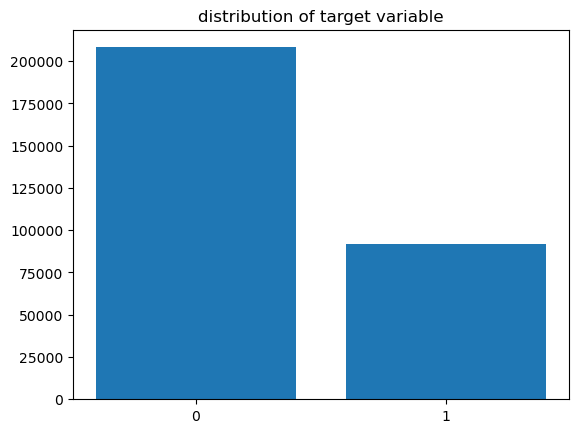

In [19]:
x = y.value_counts()
plt.bar(x.index, x)
plt.gca().set_xticks([0,1])
plt.title('distribution of target variable')
plt.show()

Here are types data variables present in this data:
- **Binary data** : A  binary variable a variable that has only 2 values..ie 0/1
- **Categorical data** : A categorical variable is a variable that can take some limited number of values.for example,day of the week.It can be one of 1,2,3,4,5,6,7 only.
- **Ordinal data** : An ordinal variable is a categorical variable that has some order associated with it.for example,the ratings that are given to a movie by a user.
- **Nominal data** :  Nominal value is a variable that has no numerical importance,such as occupation,person name etc..
- **Timeseries data** : Time series data has a temporal value attached to it, so this would be something like a date or a time stamp that you can look for trends in time.



## Method 1: Label encoding <a id='1'></a>
In this method I change every categorical data to a number. That is each type will be subtuted by a number. for example I will substitute 1 for Grandmaster,2 for master ,3 for expert etc..
For implementing this I will first import *Labelencoder* from  *sklearn* module.

In [21]:
from sklearn.preprocessing import LabelEncoder

In [26]:
%%time

train=pd.DataFrame()
label=LabelEncoder() # Initialize the labelencoder class
for c in X.columns:
    if (X[c].dtype=='object'):
        train[c]=label.fit_transform(X[c]) # Call the fit() method to fit the data, Transform data to labelencoded data
    else:
        train[c]=X[c]

CPU times: user 558 ms, sys: 64 ms, total: 622 ms
Wall time: 643 ms


In [27]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,0,1,1,1,5,5,3,...,1686,2175,2,2,1,7,3,136,2,2
1,1,0,1,0,1,1,1,4,3,5,...,650,11635,1,2,3,0,0,93,7,8
2,2,0,0,0,0,1,0,4,4,5,...,1932,8078,1,1,4,7,17,31,7,2
3,3,0,1,0,0,1,2,4,5,0,...,629,6056,1,2,0,8,3,134,2,1
4,4,0,0,0,0,0,2,4,4,0,...,1760,8231,1,2,2,0,17,158,7,8


In [28]:
label

LabelEncoder()

In [29]:
print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))
# there is no change in the number of columns.

train data set has got 300000 rows and 24 columns


In [32]:
# dictionary to map
cat_features = [col for col in X.columns if X[col].dtype == 'object']
cat_features_map = dict()

for col in cat_features:
    raw_map = dict()
    raw_val = X[col].dropna().unique()
    for i in range(len(raw_val)):
        raw_map[raw_val[i]]=i
    cat_features_map[col]=raw_map

In [33]:
cat_features_map

{'bin_3': {'T': 0, 'F': 1},
 'bin_4': {'Y': 0, 'N': 1},
 'nom_0': {'Green': 0, 'Blue': 1, 'Red': 2},
 'nom_1': {'Triangle': 0,
  'Trapezoid': 1,
  'Polygon': 2,
  'Square': 3,
  'Star': 4,
  'Circle': 5},
 'nom_2': {'Snake': 0,
  'Hamster': 1,
  'Lion': 2,
  'Cat': 3,
  'Dog': 4,
  'Axolotl': 5},
 'nom_3': {'Finland': 0,
  'Russia': 1,
  'Canada': 2,
  'Costa Rica': 3,
  'China': 4,
  'India': 5},
 'nom_4': {'Bassoon': 0, 'Piano': 1, 'Theremin': 2, 'Oboe': 3},
 'nom_5': {'50f116bcf': 0,
  'b3b4d25d0': 1,
  '3263bdce5': 2,
  'f12246592': 3,
  '5b0f5acd5': 4,
  '46cab09da': 5,
  'be5592604': 6,
  '72f8028dc': 7,
  '4604905e7': 8,
  'ad95dc0ee': 9,
  '2ff007c26': 10,
  'a35c346aa': 11,
  'dbfb714a4': 12,
  'e1558b071': 13,
  '39647c92a': 14,
  'ee55b9d67': 15,
  '416a8f3ab': 16,
  '91bde92fa': 17,
  '3aa9329e2': 18,
  '568550f04': 19,
  'caf83c0b5': 20,
  '908a1b9c9': 21,
  'e844a1f66': 22,
  'dbc448931': 23,
  '2979f0d45': 24,
  '96c73114c': 25,
  'b7bb45938': 26,
  '7da3e4aec': 27,
  'b

### model - logistic regression

In [34]:
def logistic(X,y):
    # split data into train and validation set
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=13)
    # Initialize the model
    lr = LogisticRegression()
    # Fit on the training set
    lr.fit(X_train,y_train)
    # Predict on the test
    y_pred=lr.predict(X_test)
    # Print out the model performance (e.g. simple accuracy)
    print('Accuracy: ', accuracy_score(y_test,y_pred))

In [35]:
logistic(train,y)

Accuracy:  0.6893888888888889


/Users/weicheng/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Method 2 : One hot encoding  <a id='2'></a>
The second method is encoding each category as a one hot encoding (OHE) vector (or dummy variables). OHE is a representation method that takes each category value and turns it into a binary vector of size |i|(number of values in category i) where all columns are equal to zero besides the category column. Here is a little example:   


![](https://miro.medium.com/max/878/1*WXpoiS7HXRC-uwJPYsy1Dg.png)





We can use *OneHotEncoder()* method available in* sklearn* to convert out data to on-hot encoded data.But this method produces a sparse metrix.The advantage of this methos is that is uses very less memory/cpu resourses.
To do that,we need to :
- Import OneHotEncoder from sklean.preprocessing
- Initialize the OneHotEncoder
- Fit and then transform our data

In [36]:

from sklearn.preprocessing import OneHotEncoder

one = OneHotEncoder()
one.fit(X)
train = one.transform(X)

In [37]:
train.shape

(300000, 316461)

In [40]:
logistic(train,y)

Accuracy:  0.7509111111111111


/Users/weicheng/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Method 3 : Feature hashing (a.k.a the hashing trick)  <a id='3'></a>

Feature hashing is a very cool technique to represent categories in a “one hot encoding style” as a sparse matrix but with a controlable dimensions. In feature hashing we apply a hashing function to the category and then represent it by its indices. for example, if we choose a dimension of 5 to represent “New York” we will calculate H(New York) mod 5 = 3 (for example) so New York representation will be (0,0,1,0,0).

In [41]:
from sklearn.feature_extraction import FeatureHasher

In [42]:
%%time

X_train_hash=X.copy()
for c in X.columns:
    X_train_hash[c]=X[c].astype('str')      
hashing=FeatureHasher(input_type='string',n_features=100000)
train=hashing.transform(X_train_hash.values)

CPU times: user 2.11 s, sys: 143 ms, total: 2.25 s
Wall time: 2.52 s


In [43]:

print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))



train data set has got 300000 rows and 100000 columns


In [44]:
logistic(train,y)

Accuracy:  0.7466777777777778


/Users/weicheng/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Method 4 :Encoding categories with dataset statistics  <a id='4'></a>

 Now we will try to give our models a numeric representation for every category with a small number of columns but with an encoding that will put similar categories close to each other. The easiest way to do it is replace every category with the number of times that we saw it in the dataset. This way if New York and New Jersey are both big cities, they will probably both appear many times in our dataset and the model will know that they are similar.

In [45]:
counts=X['bin_3'].value_counts().sort_index()

In [46]:
counts

bin_3
F    146465
T    153535
Name: count, dtype: int64

In [47]:
counts += np.random.rand(len(counts))/1000

In [48]:
counts 

bin_3
F    146465.000247
T    153535.000354
Name: count, dtype: float64

In [49]:
X.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8


In [51]:
%%time

X_train_stat=X.copy()
for c in X_train_stat.columns:
    if(X_train_stat[c].dtype=='object'):
        X_train_stat[c]=X_train_stat[c].astype('category')
        counts=X_train_stat[c].value_counts()
        counts=counts.sort_index()
        counts=counts.fillna(0)
        counts += np.random.rand(len(counts))/1000
        
        X_train_stat[c].cat.categories=counts

AttributeError: property 'categories' of 'Categorical' object has no setter

In [52]:
print('train data set has got {} rows and {} columns'.format(X_train_stat.shape[0],X_train_stat.shape[1]))


train data set has got 300000 rows and 24 columns


In [53]:
logistic(X_train_stat,y)

ValueError: could not convert string to float: 'T'

## Encoding cyclic features  <a id='6'></a>
![](https://miro.medium.com/max/343/1*70cevmU8wNggGJEdLam1lw.png)

Some of our features are cyclic in nature.ie day,month etc.

A common method for encoding cyclical data is to transform the data into two dimensions using a sine and consine transformation.



In [54]:
%%time

X_train_cyclic=X.copy()
columns=['day','month']
for col in columns:
    X_train_cyclic[col+'_sin']=np.sin((2*np.pi*X_train_cyclic[col])/max(X_train_cyclic[col]))
    X_train_cyclic[col+'_cos']=np.cos((2*np.pi*X_train_cyclic[col])/max(X_train_cyclic[col]))
X_train_cyclic=X_train_cyclic.drop(columns,axis=1)

X_train_cyclic[['day_sin','day_cos']].head(3)

CPU times: user 132 ms, sys: 70.5 ms, total: 203 ms
Wall time: 217 ms


,day_sin,day_cos
0,9.749279e-01,-0.222521
1,-2.449294e-16,1.000000
2,-2.449294e-16,1.000000


In [55]:
X_train_cyclic[['day_sin','day_cos']].head(3)

,day_sin,day_cos
0,9.749279e-01,-0.222521
1,-2.449294e-16,1.000000
2,-2.449294e-16,1.000000


In [56]:
pd.set_option('display.float_format', lambda x: '%.16f' % x)

In [57]:
one=OneHotEncoder()

one.fit(X_train_cyclic)
train=one.transform(X_train_cyclic)

print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))


train data set has got 300000 rows and 316479 columns


In [58]:
logistic(train,y)

Accuracy:  0.7526444444444444


/Users/weicheng/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Method 5 : Target encoding <a id='7'></a>
 		
Target-based encoding is numerization of categorical variables via target. In this method, we replace the categorical variable with just one new numerical variable and replace each category of the categorical variable with its corresponding probability of the target (if categorical) or average of the target (if numerical). The main drawbacks of this method are its dependency to the distribution of the target, and its lower predictability power compare to the binary encoding method.

for example,
<table style="width : 20%">
    <tr>
    <th>Country</th>
    <th>Target</th>
    </tr>
    <tr>
    <td>India</td>
    <td>1</td>
    </tr>
    <tr>
    <td>China</td>
    <td>0</td>
    </tr>
    <tr>
    <td>India</td>
    <td>0</td>
    </tr>
    <tr>
    <td>China</td>
    <td>1</td>
    </tr>
    </tr>
    <tr>
    <td>India</td>
    <td>1</td>
    </tr>
</table>



Encoding for India = [Number of true targets under the label India/ Total Number of targets under the label India] 
which is 2/3 = 0.66

<table style="width : 20%">
    <tr>
    <th>Country</th>
    <th>Target</th>
    </tr>
    <tr>
    <td>India</td>
    <td>0.66</td>
    </tr>
    <tr>
    <td>China</td>
    <td>0.5</td>
    </tr>
</table>



In [59]:
%%time

X_target=df_train.copy()
X_target['day']=X_target['day'].astype('object')
X_target['month']=X_target['month'].astype('object')
for col in X_target.columns:
    if (X_target[col].dtype=='object'):
        target= dict ( X_target.groupby(col)['target'].agg('sum')/X_target.groupby(col)['target'].agg('count'))
        X_target[col]=X_target[col].replace(target).values
        
    
    

X_target.head(4)

CPU times: user 1min 43s, sys: 626 ms, total: 1min 44s
Wall time: 1min 44s


,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,0.3025368808415019,0.2901066100306315,0.3271452242404253,0.3609780606263607,0.3071619652450032,0.2428130583076173,...,0.3684210526315789,2,0.4038848995195536,0.2578772802653400,0.3069927243330638,0.2083543029693005,0.4011857707509882,0.3220480387539528,0.2444321818783799,0
1,1,0,1,0,0.3025368808415019,0.2901066100306315,0.3271452242404253,0.2900544568644310,0.3592091430121749,0.2899538186169319,...,0.0769230769230769,1,0.4038848995195536,0.3263148423089036,0.2065993876856786,0.1868769854310439,0.3038801383019593,0.3402922755741127,0.3274959957287774,0
2,2,0,0,0,0.3093844945891510,0.2901066100306315,0.2417902377139529,0.2900544568644310,0.2930845550125870,0.2899538186169319,...,0.1724137931034483,1,0.3171753441053262,0.4031263691556612,0.3069927243330638,0.3518638860991316,0.2068429237947123,0.3402922755741127,0.2444321818783799,0
3,3,0,1,0,0.3093844945891510,0.2901066100306315,0.3510517302236806,0.2900544568644310,0.3071619652450032,0.3397929971371945,...,0.2272727272727273,1,0.4038848995195536,0.3609612878750392,0.3301483171705648,0.2083543029693005,0.3559845559845560,0.3220480387539528,0.2557285546415981,1


In [62]:
logistic(X_target.drop('target',axis=1),y)


Accuracy:  0.6927444444444445


/Users/weicheng/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### K-Fold target encoding <a id='8' ></a>

k-fold target encoding can be applied to reduce the overfitting. In this method, we divide the dataset into the k-folds, here we consider 5 folds. Fig.3 shows the first round of the 5 fold cross-validation. We calculate mean-target for fold 2, 3, 4 and 5 and we use the calculated values, mean_A = 0.556 and mean_B = 0.285 to estimate mean encoding for the fold-1.

![](https://miro.medium.com/max/1955/1*ZKD4eZXzd_FdN0SQDszFVQ.png)

In [60]:
X['target']=y
cols=X.drop(['target','id'],axis=1).columns

In [63]:
%%time

X_fold=X.copy()
X_fold[['ord_0','day','month']]=X_fold[['ord_0','day','month']].astype('object')
X_fold[['bin_3','bin_4']]=X_fold[['bin_3','bin_4']].replace({'Y':1,'N':0,'T':1,"F":0})
kf = KFold(n_splits = 5, shuffle = True, random_state=2019)
for train_ind,val_ind in kf.split(X):
    for col in cols:
        if(X_fold[col].dtype=='object'):
            replaced=dict(X.iloc[train_ind][[col,'target']].groupby(col)['target'].mean())
            X_fold.loc[val_ind,col]=X_fold.iloc[val_ind][col].replace(replaced).values

            

CPU times: user 1min 48s, sys: 967 ms, total: 1min 49s
Wall time: 1min 50s


In [64]:
X_fold.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,1,1,0.3274112173383851,0.3620834031150561,0.3077277158020145,0.2433118862174060,...,0.4000000000000000,0.3348339898705684,0.4038582715331298,0.2576481835564053,0.3099878812361139,0.2104425342247692,0.4058679706601467,0.3215533458747649,0.2428032285611967,0
1,1,0,1,0,1,1,0.3274112173383851,0.2899779151398502,0.3584345020799728,0.2889587873984545,...,0.0909090909090909,0.2784423255963273,0.4038582715331298,0.3246017500560915,0.2054546744219038,0.1860068259385665,0.3043057571359458,0.3412304309920018,0.3256530475552579,0
2,2,0,0,0,0,1,0.2415613730119607,0.2899806251773969,0.2929422661315221,0.2901412973667309,...,0.2000000000000000,0.2778892700285320,0.3169557806076406,0.4024375952185632,0.3088436754782079,0.3556454578889298,0.2044573643410853,0.3411608999810928,0.2462342113263868,0
3,3,0,1,0,0,1,0.3504547973788022,0.2906165491522912,0.3062683483744699,0.3401782352202837,...,0.1714285714285714,0.2782692369374860,0.4048011639185257,0.3606033095365824,0.3334074535266388,0.2045313469894476,0.3582677165354330,0.3225828114769236,0.2558004285277012,1
4,4,0,0,0,0,0,0.3504547973788022,0.2906165491522912,0.2938399752857584,0.3401782352202837,...,0.2068965517241379,0.2782692369374860,0.4048011639185257,0.2253228030587940,0.2068245371845245,0.3489128827096583,0.4104347826086956,0.3419996972449288,0.3284622603566162,0


# Summary <a id='5'></a>

Here you can see the summary of our model performance against each of the encoding techniques we have used.
It is clear that OnHotEncoder together with cyclic feature encoding yielded maximum accuracy.

<table style="width : 50%">
    <tr>
    <th>Encoding</th>
    <th>Score</th>
    <th>Wall time</th>
    </tr>
    <tr>
    <td>Label Encoding</td>
    <td>0.692</td>
    <td> 973 ms</td>
    </tr>
    <tr>
    <td>OnHotEncoder</td>
    <td>0.759</td>
    <td>1.84 s</td>
    </tr>
    <tr>
    <td>Feature Hashing</td>
    <td>0.751</td>
    <td>4.96 s</td>
    </tr>
    <tr>
    <td>Dataset statistic encoding</td>
    <td>0.694</td>
    <td>894 ms</td>
    </tr>
    </tr>
    <tr>
    <td>Cyclic + OnHotEncoding</td>
    <td>0.759</td>
    <td>431 ms</td>
    </tr>
    </tr>
    <tr>
    <td>Target encoding</td>
    <td>0.694</td>
    <td>2min 5s</td>
    </tr>
    
</table>
    